# Differential Equation of the Orbit
 The differential equation of the Orbit of a planet of constant mass '$\mathbf{m}$', under the Central force $\mathbf{\vec{F}=f(r)\hat{r}}$ with respect to the Origin '$\mathbf{O}$' taken at the centre of mass of star-planet system (effectively the position of the star), is given by:
$$ \mathbf{\frac{d^2u}{d\theta^2}+u=-\frac{m}{l^2u^2}f(\frac{1}{u})}$$
where, 

$\mathbf{\theta=}$ angular co-ordinate of the planet (independent; varies from $\mathbf{0}$ to $\mathbf{2\pi}$)

$\mathbf{r=}$ radial co-ordinate of the planet (positive, function of $\mathbf{\theta}$)

$\mathbf{l=mr^2\dot{\theta}=}$ angular momentum of the planet (constant)

$\mathbf{\dot{\theta}=\frac{d\theta}{dt}}$

$\mathbf{u=\frac{1}{r}}$

which is a nonhomogenous differential equation of second order whose solution gives us the equation of the orbit of the form $\mathbf{r(\theta)}$, for a given force law (power law in terms of $\mathbf{r}$) $\mathbf{f(r)=-\frac{1}{r^n}=-u^n}$ . 

For simplicity, let the planet collide with the star when it approaches the star's surface at a radius $\mathbf{r=0.001}$. Also, we have assumed the constant term $\mathbf{\frac{-m}{l^2}=-1}$. Hence, the differential equation reduces to:
$$ \mathbf{\frac{d^2u}{d\theta^2}+u=-\frac{1}{u^2}f(\frac{1}{u})}$$
Let, initially at $\mathbf{\theta=0}$ rad, initial distance of the planet be $\mathbf{r(0)=1}$ from '$\mathbf{O}$' and initial velocity (tangential) $\mathbf{\frac{dr(\theta)}{d\theta}|_{\theta=0}=-0.1}$

Therefore, $$\mathbf{\frac{du(\theta)}{d\theta}=\frac{d}{d\theta}(\frac{1}{r(\theta)})=-\frac{1}{r(\theta)^2}\frac{dr(\theta)}{d\theta}}$$

Then, the initial conditions for the differential equation of the orbit at $\mathbf{\theta=0}$ rad will be: $\mathbf{u(0)=\frac{1}{r(0)}=1}$ and $\mathbf{\frac{du(\theta)}{d\theta}|_{\theta=0}=-\frac{1}{r(0)^2}(\frac{dr(\theta)}{d\theta}|_{\theta=0})=0.1}$. 

Converting the second order differential equation into two first order simultaneous equations:

Let, $\mathbf{\frac{du}{d\theta}=v}$. Then, $ \mathbf{\frac{d^2u}{d\theta^2}=-u-\frac{1}{u^2}f(\frac{1}{u})=\frac{dv}{d\theta}}$

Thus, the two first order simultaneous equations are:
$$\mathbf{\frac{du}{d\theta}=v=f_1}$$
$$\mathbf{\frac{dv}{d\theta}=-u-\frac{1}{u^2}f(\frac{1}{u})=f_2}$$

So, the initial conditions for these first order differential equations are: $\mathbf{u(0)=\frac{1}{r(0)}=1}$ and  $\mathbf{v(0)=\frac{du(\theta)}{d\theta}|_{\theta=0}=0.1}$

Now, we can use 4th order RK method to solve this second order differential equation and plot the orbit for different cases of the force law.

In [224]:
import numpy as np #np is arbitrary
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
def force(n,u):
    return -u**n

In [226]:
def f1(v):
    return v

In [227]:
def f2(n,u):
    return -u-(force(n,u)/u**2)

In [228]:
def RK4(n,h,u,v):
    u_v=[]
    k1=h*f1(v)
   
    l1=h*f2(n,u)
    k2=h*f1(v+l1/2)
    l2=h*f2(n,u+k1/2)
    k3=h*f1(v+l2/2)
    l3=h*f2(n,u+k2/2)
    k4=h*f1(v+l3)
    l4=h*f2(n,u+k3)
    k=(k1+2*k2+2*k3+k4)/6
    l=(l1+2*l2+2*l3+l4)/6
    u_v.append(u+k)
    u_v.append(v+l)
    return u_v

In [229]:
def X_Y(n):
    u=1
    v=0.1
    theta=0
    h=0.1
    X=[]
    Y=[]
    T=[]
    
    X.append((1/u)*np.cos(theta))
    Y.append((1/u)*np.sin(theta))
    
    err=0
    t = np.arange(theta,theta+20*3.14,h)
    
    for i in t:
        T.append(i)
        u_v=[]
        u_v=RK4(n,h,u,v)
        u=u_v[0]
        v=u_v[1]
        
        r=1/u
        x=r*np.cos(i)
        
        X.append(x)
        y=r*np.sin(i)
        
        Y.append(y)
        if abs(r)<0.001 or abs(r)>10:
            err_theta=i
            err_r=r
            err=1
            break
   
    #if err==1:
        #t = np.arange(-err_theta,0,h)
    
        #for i in t:
            #T.append(i)
            #u_v=[]
            #u_v=RK4(n,h,u,v)
            #u=u_v[0]
            #v=u_v[1]
            #V.append(v)
            #r=1/u
            #x=r*np.cos(i)
            
            #X.append(x)
            #y=r*np.sin(i)
            #print(y)
            #Y.append(y)
            #if abs(r)<0.001:
                #err_theta=i
                #err_r=r
                #err=1
                #break
    plt.plot(X,Y)
        

## Case-1: Inverse square law
When the force varies as the inverse 2nd power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^2}\hat{r}}$

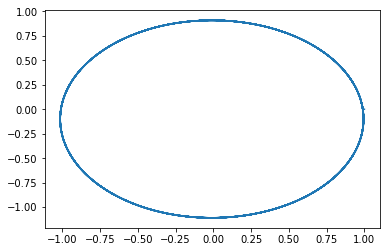

In [230]:
n=2
X_Y(n)

## Case-2:
When the force varies as the inverse 3rd power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^3}\hat{r}}$

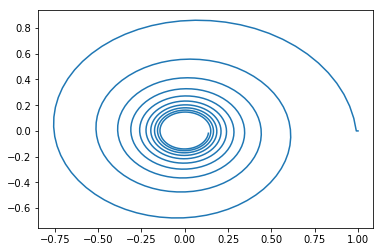

In [231]:
n=3
X_Y(n)

## Case-3:
When the force varies as the inverse 4th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^4}\hat{r}}$

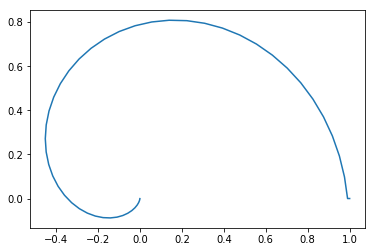

In [232]:
n=4
X_Y(n)

## Case-4:
When the force varies as the inverse 5th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^5}\hat{r}}$

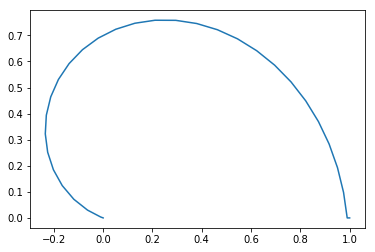

In [233]:
n=5
X_Y(n)

## Case-5:
When the force varies as the inverse 6th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^6}\hat{r}}$

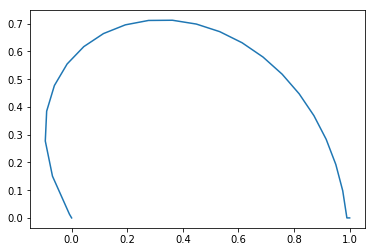

In [234]:
n=6
X_Y(n)

## Case-6:
When the force varies as the inverse 7th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^7}\hat{r}}$

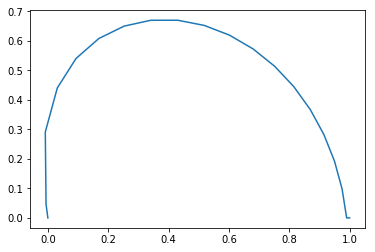

In [235]:
n=7
X_Y(n)

## Case-7:
When the force varies as the inverse 8th power of the distance: $\mathbf{\vec{F}=-\frac{1}{r^8}\hat{r}}$

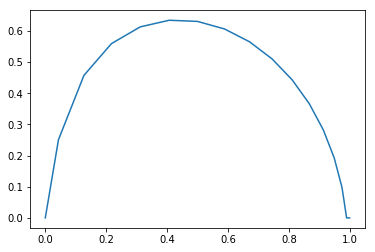

In [236]:
n=8
X_Y(n)